<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              421 non-null    object 
 1   SCHOOL NAME                      421 non-null    object 
 2   Num of SA

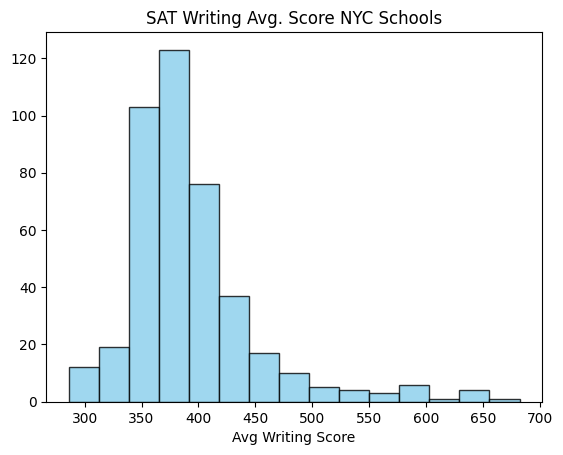

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  read the dataset
df = pd.read_csv("2012-sat-results.csv")

print(df.info())
print("")

# convert all values to numeric
df["SAT Critical Reading Avg. Score"] = pd.to_numeric(df["SAT Critical Reading Avg. Score"], errors="coerce")
df["SAT Math Avg. Score"] = pd.to_numeric(df["SAT Math Avg. Score"], errors="coerce")
df["SAT Writing Avg. Score"] = pd.to_numeric(df["SAT Writing Avg. Score"], errors="coerce")

# Drop rows with NaN values
df = df.dropna(subset=["SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score"])

print(df.info())
print("")

# population params
mu = df["SAT Writing Avg. Score"].mean()
tao = df["SAT Writing Avg. Score"].sum()
sigmasq = df["SAT Writing Avg. Score"].var(ddof=0)

print(f"The mu is: {mu}")
print(f"The tao is: {tao}")
print(f"The sigma^2 is: {sigmasq}")

print("")

plt.hist(df["SAT Writing Avg. Score"], bins=15, color="skyblue", alpha=0.8, edgecolor="black")
plt.title("SAT Writing Avg. Score NYC Schools")
plt.xlabel("Avg Writing Score")
plt.show()


#### Problem 1: Assign probabilities $p_i$'s is proportional to a variable related to your variable of interest, you first need to determine the relationship between the two variables. Once you have identified the related variable, you can calculate the probabilities proportional to its values

In [277]:
# Correlation With an Auxilary Variable
# Our variable of interest is SAT Writing Avg. Score. A related variable we are using is SAT Math Avg. Score. The SAT Math Avg. Score
# has a 0.8885 correlation with SAT Writing Avg. Score. 
df["SAT Math Avg. Score"].corr(df["SAT Writing Avg. Score"])

np.float64(0.8884561176774858)

In [278]:
# Creating probabilities proportional to Avg Math score as it has high 
df["probs"] = df["SAT Math Avg. Score"] / df["SAT Math Avg. Score"].sum()

In [279]:
df["probs"].head()

0    0.002321
1    0.002431
2    0.002310
3    0.002304
4    0.002488
Name: probs, dtype: float64

#### Problem 2: Take a sample of size $n$ (that you define in the Report 2) with replacement with $p_i$'s defined above.

In [280]:
# Sample size
n = 80
seed = 42
sampled_df = df.sample(n=n, weights=df["probs"], replace=True, random_state=seed)

In [281]:
sampled_df.reset_index(drop=True, inplace=True)
sampled_df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,probs
0,09X543,HIGH SCHOOL FOR VIOLIN AND DANCE,27,353.0,315.0,371.0,0.001810
1,31R064,GAYNOR MCCOWN EXPEDITIONARY LEARNING SCHOOL,61,398.0,412.0,385.0,0.002367
2,21K540,JOHN DEWEY HIGH SCHOOL,448,404.0,468.0,390.0,0.002689
3,15K698,SOUTH BROOKLYN COMMUNITY HIGH SCHOOL,8,430.0,416.0,425.0,0.002390
4,02M600,THE HIGH SCHOOL OF FASHION INDUSTRIES,335,423.0,423.0,411.0,0.002431


In [282]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              80 non-null     object 
 1   SCHOOL NAME                      80 non-null     object 
 2   Num of SAT Test Takers           80 non-null     object 
 3   SAT Critical Reading Avg. Score  80 non-null     float64
 4   SAT Math Avg. Score              80 non-null     float64
 5   SAT Writing Avg. Score           80 non-null     float64
 6   probs                            80 non-null     float64
dtypes: float64(4), object(3)
memory usage: 4.5+ KB


#### Problem 3. Estimate your parameter of interest using the Hansen-Hurwitz estimator. Estimate its variance and calculate a confidence interval of chosen in the Report 2 level $\alpha$.
Hansen-Hurwitz Estimator for $\mu$ is:

$\hat{\mu}_p = \frac{1}{N} \hat{\tau_p}$

$\hat{\tau_p} = \frac{1}{n} \sum_{i=1}^n \frac{y_i}{p_i}$

In [283]:
N = len(df)
y_i = sampled_df["SAT Writing Avg. Score"].values
p_i = sampled_df["probs"].values

HH_tau_est = np.sum(y_i / p_i) / n
HH_mu_est = HH_tau_est / N
print("Estimated true SAT Writing Avg. Score using HH: ", round(HH_mu_est, 2))

Estimated true SAT Writing Avg. Score using HH:  393.84


Estimated Variance for HH $\mu$:

$\hat{var}(\hat{\mu_p}) = \frac{1}{N^2} \hat{var}(\hat{\tau_p})$

$\hat{var}(\hat{\tau_p}) = \frac{1}{n(n-1)} \sum_{i=1}^{n} (\frac{yi}{pi} − \hat{\tau_p})^2$



In [284]:
HH_tau_var_est = (1 / (n * (n-1))) * np.sum(((y_i / p_i) - HH_mu_est)**2)
HH_mu_var_est = 1/(N**2) * HH_tau_var_est
print("Estimated variance of HH Estimator for SAT Writing Avg. Score: ", round(HH_mu_var_est, 2))

Estimated variance of HH Estimator for SAT Writing Avg. Score:  1966.46


An approximate $(1 − \alpha)100\%$ confidence interval for the population total, based on the normal approximation for the estimator $\hat{\tau_p}$ , is

$\hat{\tau_p} \pm t_{\frac{\alpha}{2}, n-1} \sqrt{\hat{var}(\hat{\tau_p})}$

And for $\hat{\mu_p} \pm t_{\frac{\alpha}{2}, n-1}\sqrt{\hat{var}(\hat{\mu_p})}$

Based on Report 2, we have $\alpha = .05$.

In [285]:
from scipy.stats import t

alpha = .05

t_crit = t.ppf(1-(alpha/2), n-1)
StdErr = t_crit * np.sqrt(HH_mu_var_est)

HH_CI = HH_mu_est - StdErr, HH_mu_est + StdErr
print("CI with alpha=.05 for population SAT Writing Avg. Score: (", round(HH_CI[0], 2), ",", round(HH_CI[1], 2), ")")

CI with alpha=.05 for population SAT Writing Avg. Score: ( 305.58 , 482.11 )


#### Problem 4: Calculate $\pi_i$’s for selected sampling units

$\pi_i = 1 - (1 - p_i) ^ n$


In [286]:
sampled_df["pi_i"] = 1 - (1 - sampled_df["probs"])**n
sampled_df[["SAT Writing Avg. Score", "probs", "pi_i"]].head()

,SAT Writing Avg. Score,probs,pi_i
0,371.0,0.001810,0.134922
1,385.0,0.002367,0.172726
2,390.0,0.002689,0.193803
3,425.0,0.002390,0.174249
4,411.0,0.002431,0.176909


#### Problem 5: Estimate your parameter of interest by Horvitz-Thompson estimator. Estimate its variance and give a confidence interval of $\alpha$ level that you choose in the Report 2.

In [287]:
# quick renaming to make stuff easier to work with
sampled_df.rename(columns={'SAT Writing Avg. Score':'y_i',
                           'probs':'p_i'},
                  inplace=True)
sampled_df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,y_i,p_i,pi_i
0,09X543,HIGH SCHOOL FOR VIOLIN AND DANCE,27,353.0,315.0,371.0,0.001810,0.134922
1,31R064,GAYNOR MCCOWN EXPEDITIONARY LEARNING SCHOOL,61,398.0,412.0,385.0,0.002367,0.172726
2,21K540,JOHN DEWEY HIGH SCHOOL,448,404.0,468.0,390.0,0.002689,0.193803
3,15K698,SOUTH BROOKLYN COMMUNITY HIGH SCHOOL,8,430.0,416.0,425.0,0.002390,0.174249
4,02M600,THE HIGH SCHOOL OF FASHION INDUSTRIES,335,423.0,423.0,411.0,0.002431,0.176909


Our paremeter of interest is $\mu$.
The Horvitz-Thompson estimator for $\mu$ is:

$\hat{\mu_\pi} = \frac{1}{N}\sum_{i=1}^{v} \frac{y_i}{\pi_i}$

In [288]:
# Get vs
sampled_df_unique = sampled_df.drop_duplicates(subset=['y_i'])
sampled_df_unique.reset_index(inplace=True)
n_v = len(sampled_df_unique)

HT_mu_est = (1 / N) * sum(sampled_df_unique['y_i'] / sampled_df_unique['pi_i'])
print("Estimated true SAT Writing Avg. Score using HT:", round(HT_mu_est, 2))

Estimated true SAT Writing Avg. Score using HT: 291.64


Estimated Variance for $\hat{\mu_\pi}$ of Horvitz-Thompson is:

$\hat{var}(\hat{\mu_\pi}) = \frac{1}{N^2} \sum^{v}_{i=1} \frac{1-\pi_i}{\pi_i^2}y_i^2 + \sum^{v}_{i=1}\sum_{i\neq j}\frac{\pi_{ij} - \pi_i\pi_j}{\pi_i\pi_j}\frac{y_iy_j}{\pi_{ij}}$

$$
%\begin{align*}
%    \pi_{ij} &= P(i \cup j)\\
%    &= P(i) + P(j) - P(i \cap j)\\
%    &= \pi_i + \pi_j - (1 - P(i^C \cup j^C))\\
%    \pi_{ij} &= \pi_i + \pi_j - 1 + (1 - p_i - p_j)^n\\
%\end{align*}
$$

In [289]:
first_component = sum(((1 - sampled_df_unique['pi_i']) / sampled_df_unique['pi_i']) * (sampled_df_unique['y_i']**2))

second_component = 0
for i in range(n_v):
  for j in range(n_v):
    if i != j:
        pi_i  = sampled_df_unique.loc[i, 'pi_i']
        pi_j  = sampled_df_unique.loc[j, 'pi_i']
        p_i   = sampled_df_unique.loc[i, 'p_i']
        p_j   = sampled_df_unique.loc[j, 'p_i']
        y_i   = sampled_df_unique.loc[i, 'y_i']
        y_j   = sampled_df_unique.loc[j, 'y_i']
        pi_ij = (pi_i + pi_j - 1) + (1 - p_i - p_j)**n

        second_component += ((pi_ij - (pi_i * pi_j)) / (pi_i * pi_j)) * ((y_i * y_j) / (pi_ij))

HT_mu_var_est = (1 / (N**2)) * (first_component + second_component)

print("Estimated variance of HT Estimator for SAT Writing Avg. Score: ", round(HT_mu_var_est, 2))

Estimated variance of HT Estimator for SAT Writing Avg. Score:  -636.84


An approximate $(1 − \alpha)100\%$ confidence interval for the population total based on $\hat{\mu\pi}$ is

$\hat{\mu_\pi} \pm t_{\frac{\alpha}{2}, n-1}\sqrt{\hat{var}(\hat{\mu_\pi})}$

Based on Report 2, we have $\alpha = .05$.

In [290]:
alpha = .05

t_crit = t.ppf(1 - (alpha / 2), n - 1)
StdErr = t_crit * np.sqrt(HT_mu_var_est)

HT_CI = HT_mu_est - (t_crit * StdErr), HT_mu_est + (t_crit * StdErr)
print("CI with alpha=.05 for population SAT Writing Avg. Score: (", round(HT_CI[0], 2), ",", round(HT_CI[1], 2), ")")

CI with alpha=.05 for population SAT Writing Avg. Score: ( nan , nan )


/tmp/ipykernel_17251/1002607027.py:4: RuntimeWarning: invalid value encountered in sqrt
  StdErr = t_crit * np.sqrt(HT_mu_var_est)


#### Problem 6: Estimate your parameter of interest by Generalized Unequal Probability estimator ($\hat{\mu_g}$). Estimate its variance and give a confidence interval of $\alpha$ level that you choose in the Report 2.
Our paremeter of interest is $\mu$.
The Generalized Unequal Probability estimator for $\mu$ is:

$\large\hat{\mu_g} = \frac{\sum_{i=1}^{v} \frac{y_i}{\pi_i}}{\sum_{i=1}^{v} \frac{1}{\pi_i}}$

In [291]:
y_i = sampled_df_unique['y_i']
pi_i = sampled_df_unique['pi_i']

GUP_mu_est = sum(y_i / pi_i) / sum(1 / pi_i)

print("Estimated true SAT Writing Avg. Score using HT:", round(GUP_mu_est, 2))

Estimated true SAT Writing Avg. Score using HT: 395.66


Estimated Variance for $\hat{\mu_g}$ of Generalized Unequal Probability is:

$\large\hat{var}(\hat{\mu_g}) = \frac{1}{N^2} \sum^{v}_{i=1} \frac{1-\pi_i}{\pi_i^2}(y_i - \hat{\mu_g})^2 + \sum^{v}_{i=1}\sum_{i\neq j}\frac{\pi_{ij} - \pi_i\pi_j}{\pi_i\pi_j}\frac{(y_i - \hat{\mu_g})(y_j - \hat{\mu_g})}{\pi_{ij}}$

In [292]:
first_component = sum(((1 - sampled_df_unique['pi_i']) / sampled_df_unique['pi_i']) * ((sampled_df_unique['y_i'] - GUP_mu_est)**2))

second_component = 0
for i in range(n_v):
  for j in range(n_v):
    if i != j:
        pi_i  = sampled_df_unique.loc[i, 'pi_i']
        pi_j  = sampled_df_unique.loc[j, 'pi_i']
        p_i   = sampled_df_unique.loc[i, 'p_i']
        p_j   = sampled_df_unique.loc[j, 'p_i']
        y_i   = sampled_df_unique.loc[i, 'y_i']
        y_j   = sampled_df_unique.loc[j, 'y_i']
        pi_ij = (pi_i + pi_j - 1) + (1 - p_i - p_j)**n

        second_component += (pi_ij - (pi_i * pi_j)) * (y_i - GUP_mu_est) * (y_j - GUP_mu_est) / (pi_ij * pi_i * pi_j)

GUP_mu_var_est = (1 / (N**2)) * (first_component + second_component)

print("Estimated variance of GUP Estimator for SAT Writing Avg. Score: ", round(GUP_mu_var_est, 2))

Estimated variance of GUP Estimator for SAT Writing Avg. Score:  5.24


In [293]:
alpha = .05

t_crit = t.ppf(1 - (alpha / 2), n - 1)
StdErr = t_crit * np.sqrt(GUP_mu_var_est)

GUP_CI = GUP_mu_est - (t_crit * StdErr), GUP_mu_est + (t_crit * StdErr)
print("CI with alpha=.05 for population SAT Writing Avg. Score: (", round(GUP_CI[0], 2), ",", round(GUP_CI[1], 2), ")")

CI with alpha=.05 for population SAT Writing Avg. Score: ( 386.59 , 404.74 )
